In [1]:
import numpy as np
import random
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt

### Genetic Algorithm Steps
<br>
 
Genetic Algorithms are used to solve n! situations where the best fit is impossible to be knowed (we try to search for a good fit, not the best). Ex for 20 cities we would have a 19! problem scale and that could potentially take 1000+ years to solve.

<br>
-<b> Prepare Population </b> Define the raw data, define the distance function
<br> 

-<b> Get Population </b> Population would be the input (in this case the combination of route). Ex = [1, 3, 2, 4] or [4, 2, 3, 1]
<br>

-<b> Fitness </b> Evaluation of scores for each solution across the population. The higher the fitness the better solution. We must ensure that our solution has a high fitness. In the case of the routes we should take the shortest one. The number of the route must be multiplied by -1 to ensure that the minimium dist would have the hightest fitness (min length). We could also apply 1/length to ensure the min_route would have higher fitness.
<br>

-<b> Sort the Population by Fitness </b> self explained. The highest fitness population (ind) would go to the next generation. The size of this sample is a hyper-parameter. We can have a Roullete Wheel also to add randomness to the algorithm
<br>

-<b> Father (first solution) and Mother (Second Solution) </b> In this step we would start "breeding" the solutions to create new individuals - crossover method as an example. If there is a repetition on the solution we could perform a for loop to mitigate that
<br>

-<b> Mutation </b> Choose any element on the Child and change it randomnly (Each solution is called chromossome and each element of it is called gene). That is called offspring (new child based on mutation)
<br>

-<b> New Cycle </b> Replace the original population within the last input (algorithm conversion)
<br>

-<b> Resume </b> Get Data > Define Distance Func. > Get Population Randomnly (combinations of routes) > Create Fitness > Select best Fitness > From the best perform a cross_over from father/mother > on the child perform Mutation > Replace part of the original population with new sample

#### Generating City Locations

In [2]:
def CitiesGraph(numCities, minDist, maxDist):
    
    cities = np.zeros(shape=(numCities, 2), dtype=int)

    for city in range(numCities):
        # Define X element of Location
        cities[city, 0] = random.randint(minDist, maxDist)
        cities[city, 1] = random.randint(minDist, maxDist)
    
    return cities

numCities = 10 # Initial Number of Cities

cities = CitiesGraph(numCities, 
                     minDist = 0, 
                     maxDist = 250)

cities

array([[207, 218],
       [173, 181],
       [ 50,  92],
       [171, 206],
       [202,  72],
       [ 66, 110],
       [ 74, 223],
       [ 60,  38],
       [ 83,  69],
       [185,  54]])

#### Calculates Initial Population

In [3]:
def shuffle_list(cities, population_size):
    
    random_route = []
    default_list = [city_index for city_index in range(len(cities))]
    
    while len(random_route) < population_size:
        
        shuffle_list = default_list.copy()
        random.shuffle(shuffle_list)
        shuffle_list.append(shuffle_list[0])
        
        if shuffle_list in random_route:
            pass
        else:
            random_route.append(shuffle_list)
            
    return random_route

def initial_population(cities, population_size):
    
    if population_size > math.factorial(len(cities)-1):
        print('Define a population_size less than (n-1)!')
    else:
        return shuffle_list(cities=cities, population_size=population_size)
    
initial_pop = initial_population(cities=cities, population_size=6)

initial_pop

[[0, 7, 6, 2, 9, 1, 3, 8, 4, 5, 0],
 [2, 1, 3, 9, 7, 0, 8, 6, 4, 5, 2],
 [9, 7, 8, 4, 0, 2, 6, 3, 1, 5, 9],
 [7, 2, 0, 3, 9, 4, 8, 5, 1, 6, 7],
 [5, 7, 8, 2, 6, 0, 4, 1, 3, 9, 5],
 [6, 8, 0, 1, 3, 7, 9, 2, 5, 4, 6]]

<b>cities</b> > array containing city (x,y) coordinates for each city. Obs: city "name" is the array position
<br>
<b>initial_population</b> > array containing the routes based on population_size (ex: [4, 1, 0, 2, 3])

#### Calculates Distance and Route Length

In [4]:
def calculate_distances(pop_array, city_location = cities):
    
    distances_matrix = []
    distances_row = []
    
    for route in pop_array:
        
        counter = 0
        while counter < (len(route) - 1):
            first_city = city_location[route[counter]]
            second_city = city_location[route[counter+1]]
            distance = math.dist(first_city, second_city)
            distances_row.append(distance)
            counter = counter + 1
            
        distances_matrix.append(distances_row)
        distances_row = []
        
    # output will be a matriz containing the distances for each route of the population (either the initial or generational)
    return np.array(distances_matrix)

initial_distances = calculate_distances(pop_array=initial_pop, city_location = cities)
# expected shape > (population, cities) considering that the target must return to the first city after that

initial_distances

array([[232.39836488, 185.52897348, 133.18032888, 140.24621207,
        127.56566936,  25.07987241, 162.82813025, 119.03780912,
        141.20906486, 177.60912139],
       [151.82226451,  25.07987241, 152.64337522, 126.01983971,
        232.39836488, 193.8478785 , 154.26276284, 197.95201439,
        141.20906486,  24.08318916],
       [126.01983971,  38.60051813, 119.03780912, 146.08559135,
        201.30822139, 133.18032888,  98.47842403,  25.07987241,
        128.41339494, 131.5180596 ],
       [ 54.91812087, 201.30822139,  37.94733192, 152.64337522,
         24.75883681, 119.03780912,  44.38468204, 128.41339494,
        107.54068997, 185.52897348],
       [ 72.24956747,  38.60051813,  40.22437072, 133.18032888,
        133.09395178, 146.08559135, 112.79184368,  25.07987241,
        152.64337522, 131.5180596 ],
       [154.26276284, 193.8478785 ,  50.24937811,  25.07987241,
        201.35789033, 126.01983971, 140.24621207,  24.08318916,
        141.20906486, 197.95201439]])

In [5]:
def calculate_fitness(distance_array):
    
    fitness_matrix = []
    
    for route_index in distance_array:
        
        fitness_row = 1/sum(route_index)
        
        fitness_matrix.append(fitness_row)
    
    return fitness_matrix

initial_fitness = calculate_fitness(distance_array=initial_distances)

initial_fitness

[0.0006921931119688693,
 0.000714633523110903,
 0.0008712910862646941,
 0.000946538165406684,
 0.0010147468293658917,
 0.0007972522844277113]

<b>cities</b> > array containing city (x,y) coordinates for each city. Obs: city "name" is the array position
<br>
<b>initial_population</b> > array containing the routes based on population_size (ex: [4, 1, 0, 2, 3])
<br>
<b>initial_distances</b > array containing the distances between each point of row
<br>
<b>initial_fitness</b> > array containing the fitness values for each route 

#### Select Best Half of Population

In [6]:
def select_best_half(population, fitness):
    
    zipped = zip(population, fitness)
    
    res = sorted(zipped, key = lambda x: x[1], reverse=True)

    res = res[:len(res)//2]

    routes_values, fitness_values = zip(*res)
    
    return routes_values

best_half = select_best_half(initial_pop, initial_fitness)

best_half

([5, 7, 8, 2, 6, 0, 4, 1, 3, 9, 5],
 [7, 2, 0, 3, 9, 4, 8, 5, 1, 6, 7],
 [9, 7, 8, 4, 0, 2, 6, 3, 1, 5, 9])

<b>cities</b> > array containing city (x,y) coordinates for each city. Obs: city "name" is the array position
<br>
<b>initial_population</b> > array containing the routes based on population_size (ex: [4, 1, 0, 2, 3])
<br>
<b>initial_distances</b > array containing the distances between each point of row
<br>
<b>initial_fitness</b> > array containing the fitness values for each route 
<br>
<b>best_half</b> > selects based on the fitness value the best half of the population

# FIX CREATE_OFFSPRING

In [7]:
def create_offsprings(population, cities=cities):
    
    default_list = [city_index for city_index in range(len(cities))]
    
    first_half = []
    second_half = []
    offsprings_routes = []
    
    for route in population:
        first_half.append(route[:len(route)//2]) 
        
    if len(first_half) % 2 == 1:
        first_half.append(first_half[0])

    for route in population:
        second_half.append(route[len(route)//2:])
        
    if len(second_half) % 2 == 1:
        second_half.append(second_half[0])
        
    counter = 0
    while counter < (len(first_half)-1):
        
        # GENE 01 GUARANTEE FIRST AND LAST INDEX
        offspring_gene_first = first_half[counter] + second_half[counter + 1]
        offspring_gene_first[-1] = offspring_gene_first[0]        
        
        # GENE 02 GUARANTEE FIRST AND LAST INDEX
        offspring_gene_second = first_half[counter + 1] + second_half[counter]
        offspring_gene_second[-1] = offspring_gene_second[0]  
        
        gene_index = 0
        for gene in offspring_gene_first:
            
            ogf = offspring_gene_first.copy()
            del ogf[gene_index]
            
            if (gene_index < len(offspring_gene_first)//2) | (gene_index == len(offspring_gene_first)-1):
                pass
            else:
                if gene in offspring_gene_first[:gene_index]:
                    offspring_gene_first[gene_index] = random.choice([i for i in range(0, len(offspring_gene_first)-1) if i not in offspring_gene_first[:gene_index]])
                    
            gene_index = gene_index + 1
        
        
        
        
        gene_index = 0
        for gene in offspring_gene_second:
            
            ogf = offspring_gene_second.copy()
            del ogf[gene_index]
            
            if (gene_index < len(offspring_gene_second)//2) | (gene_index == len(offspring_gene_second)-1):
                pass
            else:
                if gene in offspring_gene_second[:gene_index]:
                    offspring_gene_second[gene_index] = random.choice([i for i in range(0, len(offspring_gene_second)-1) if i not in offspring_gene_second[:gene_index]])
                    
            gene_index = gene_index + 1        

        offsprings_routes.append(offspring_gene_first)  
        offsprings_routes.append(offspring_gene_second)
        
        counter = counter + 2

    return offsprings_routes
        
best_half_offspring = create_offsprings(population=best_half, cities=cities)

In [8]:
best_half_offspring

[[5, 7, 8, 2, 6, 4, 1, 0, 9, 3, 5],
 [7, 2, 0, 3, 9, 8, 4, 1, 5, 6, 7],
 [9, 7, 8, 4, 0, 6, 5, 1, 3, 2, 9],
 [5, 7, 8, 2, 6, 3, 4, 1, 0, 9, 5]]

### Concat half and halfoffspring

In [9]:
generation_n = list(best_half) + list(best_half_offspring)

generation_n

[[5, 7, 8, 2, 6, 0, 4, 1, 3, 9, 5],
 [7, 2, 0, 3, 9, 4, 8, 5, 1, 6, 7],
 [9, 7, 8, 4, 0, 2, 6, 3, 1, 5, 9],
 [5, 7, 8, 2, 6, 4, 1, 0, 9, 3, 5],
 [7, 2, 0, 3, 9, 8, 4, 1, 5, 6, 7],
 [9, 7, 8, 4, 0, 6, 5, 1, 3, 2, 9],
 [5, 7, 8, 2, 6, 3, 4, 1, 0, 9, 5]]

### Mutation Generator

In [10]:
def apply_mutation(generation, tx_mutation=9.5):
    
    generation_mutated = []
    
    for route in generation:
        if random.randint(0, 1000) < tx_mutation:
        
            rn_1 = random.choice([i for i in range(1, len(route)-2)])
            rn_2 = random.choice([i for i in range(1, len(route)-2) if i not in [rn_1]])

            rn_1n = route[rn_2]
            rn_2n = route[rn_1]

            route[rn_1] = rn_1n
            route[rn_2] = rn_2n
        
            generation_mutated.append(route)  
        else:
            generation_mutated.append(route)   
            
    return generation_mutated

generation_mutated = apply_mutation(generation=generation_n, tx_mutation=9.5)

In [11]:
generation_mutated

[[5, 7, 8, 2, 6, 0, 4, 1, 3, 9, 5],
 [7, 2, 0, 3, 9, 4, 8, 5, 1, 6, 7],
 [9, 7, 8, 4, 0, 2, 6, 3, 1, 5, 9],
 [5, 7, 8, 2, 6, 4, 1, 0, 9, 3, 5],
 [7, 2, 0, 3, 9, 8, 4, 1, 5, 6, 7],
 [9, 7, 8, 4, 0, 6, 5, 1, 3, 2, 9],
 [5, 7, 8, 2, 6, 3, 4, 1, 0, 9, 5]]

### Implementation

In [15]:
def iterate_over_generations(generation_stop, initial_pop=initial_pop, cities=cities):
    
    generation = 0
    fitness_array = []
    
    Vardistances = calculate_distances(pop_array=initial_pop, city_location = cities)

    Varfitness = calculate_fitness(distance_array=Vardistances)

    VarBestHalf = select_best_half(initial_pop, Varfitness)

    VarBestHalfOffspring = create_offsprings(population=VarBestHalf, cities=cities)
    
    Generation_n = list(VarBestHalf) + list(VarBestHalfOffspring)

    Generation_mutated = apply_mutation(generation=Generation_n, tx_mutation=9.5)
    
    # input_pop for next generations after fresh start
    input_pop = Generation_mutated
    
    while generation < generation_stop:
        
        Vardistances = calculate_distances(pop_array=input_pop, city_location = cities)

        Varfitness = calculate_fitness(distance_array=Vardistances)

        VarBestHalf = select_best_half(input_pop, Varfitness)
        
        VarBestHalfOffspring = create_offsprings(population=VarBestHalf, cities=cities)

        Generation_n = list(VarBestHalf) + list(VarBestHalfOffspring)

        Generation_mutated = apply_mutation(generation=Generation_n, tx_mutation=9.5)

        input_pop = Generation_mutated
        
        # created_fitness_array
        Vardistances_fa = calculate_distances(pop_array=Generation_mutated, city_location = cities)
        Varfitness_fa = calculate_fitness(distance_array=Vardistances_fa)   
        #print(' ')
        fitness_array.append(max(Varfitness_fa))
        
        # increase a generation up
        generation = generation + 1
        
    return fitness_array, input_pop

### Definição do Universo Inicial

In [62]:
numCities = 25 # Initial Number of Cities

cities = CitiesGraph(numCities, 
                     minDist = 0, 
                     maxDist = 500)

population_size = 100 # Initial Number of Population Size

initial_pop = initial_population(cities=cities, population_size=population_size)

In [63]:
%%time

fitness_array, var_gen = iterate_over_generations(generation_stop=1000, initial_pop=initial_pop, cities=cities)

CPU times: total: 906 ms
Wall time: 6.54 s


In [64]:
import plotly.express as px

dfPlot = pd.DataFrame(fitness_array, columns=['fitness_value']).reset_index()

dfPlot = dfPlot.rename(columns={'index':'generation'})

px.line(dfPlot, 'generation', 'fitness_value')

In [65]:
# initial_pop

distances_first_generation = calculate_distances(pop_array=initial_pop, city_location = cities)

fitness_first_generation = calculate_fitness(distance_array=distances_first_generation)

best_half_first_generation = select_best_half(initial_pop, fitness_first_generation)

fitness_first_generation[0]

route_initial = best_half_first_generation[0]

In [66]:
# var_gen

distances_last_generation = calculate_distances(pop_array=var_gen, city_location = cities)

fitness_last_generation = calculate_fitness(distance_array=distances_last_generation)

best_half_last_generation = select_best_half(var_gen, fitness_last_generation)

fitness_last_generation[0]

route_last = best_half_last_generation[0]

In [67]:
counter = 0
for route_id in route_initial:
    route_initial[counter] = cities[route_id]
    counter = counter + 1
    
counter = 0
for route_id in route_last:
    route_last[counter] = cities[route_id]
    counter = counter + 1

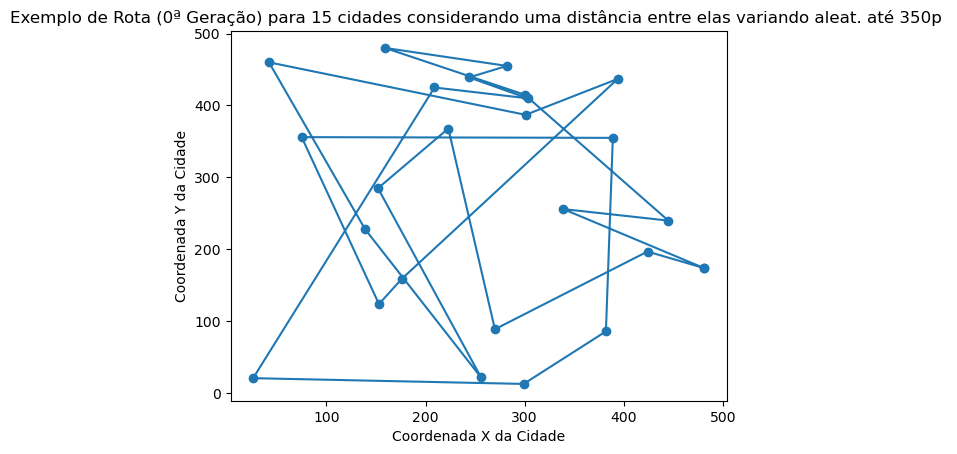

In [68]:
import matplotlib.pyplot as plt

def plot_coordinates(coordinates, gen=0):
    
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]    

    plt.plot(x, y, marker='o', linestyle='-')
    
    # Adiciona rótulos aos eixos
    plt.xlabel('Coordenada X da Cidade')
    plt.ylabel('Coordenada Y da Cidade')

    # Adiciona título ao gráfico
    plt.title(f'Exemplo de Rota ({gen}ª Geração) para 15 cidades considerando uma distância entre elas variando aleat. até 350p ')

    # Exibe o gráfico
    plt.grid(False)
    plt.show()
    
plot_coordinates(route_initial) 

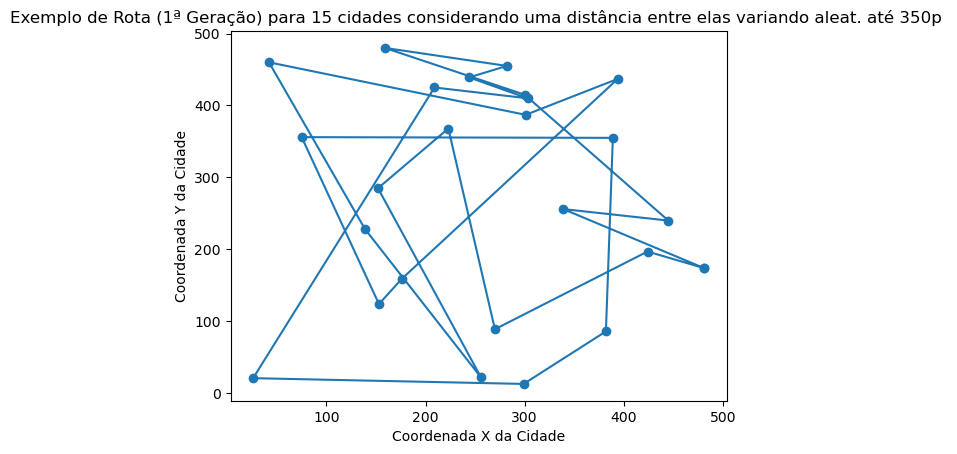

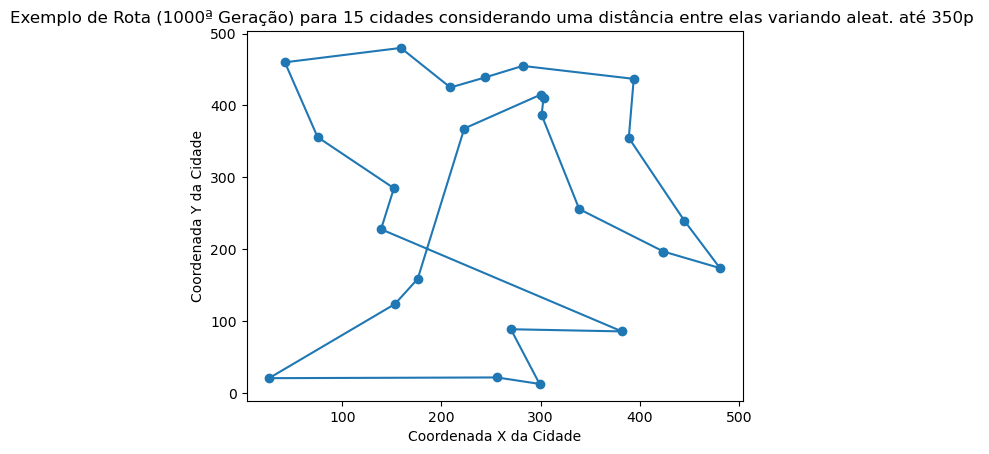

(None, None)

In [70]:
plot_coordinates(route_initial, gen=1), plot_coordinates(route_last, gen=1000) 